Neste notebook será descrito como utilizar o algoritmo do método dos momentos para calcular as concentrações de carga em um fio sujeito a uma tensão V0 seguindo as especificações mostradas.

o nosso objetivo é partir da equação para potencial elétrico:

$$ V(r) = \frac{1}{4 \piϵ} ∫\frac{ρ_s(r)}{|r - r'|}ds' $$

determinamos ρ atraves da aproximação

$$ \rho(x,y) = ∑a_n P_n(x,y) $$

onde $a_n$ são os coeficientes que determinaremos atraves do método dos momentos. 

Primeiramente importamos as bibliotecas math, numpy e matplotlib. Para funções matemáticas e plotar gráficos.


Tambe é definido os valores para o comprimento L da placa e o N.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [ ]:
L = 10
N = 10
delta = L/N
a=0.1

v0 = 1
e0 = 1

definimos os centros dos quadrados de forma ordenada com a função centers(). os vetores rn e rm serão gerados por essa função.

In [ ]:
def center(L, N):
  z = []
  delta = L/N
  for n in range(1,N+1):
    z.append( (n - (1/2)) * delta )
  return z

z = np.array(center(L,N))
print(z.shape)
print(z)

(10,)
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


geramos o vetor de tensões.

In [ ]:
def volt(n, v0):
  return np.full(n, v0)

v = volt(N, v0)
print(v.shape)
print(v)

(10,)
[1 1 1 1 1 1 1 1 1 1]


a matriz de impedância será gerada pela função abaixo. ela recebe rn e usa as formulas descritas no slides para gerar a matriz de impedancia de formato NxN.

Nosso objetivo é gerar a matriz de impedancia Z e V e então resolver o sistema Z X C = V para o vetor de coeficientes C.

$$ 2ϵ_0 V_0 = a = \sum_{n=2}^N c_n ln  ( \frac{z_n - z_m + Δ/2 + \sqrt{(z_n - z_m + Δ/2)² + a²} }{z_n - z_m - Δ/2 + \sqrt{(z_n - z_m - Δ/2)² + a²}  })   $$

In [ ]:
def impedance_matrix( z, N, a, delta ):
  matriz =[ ]
  for n in range(0,N):
    line = []
    for m in range(0,N):
      zmn = a * ( math.log( (z[n]-z[m] + delta/2 + math.sqrt( math.pow(z[n] - z[m] + delta/2, 2 ) + math.pow(a,2)) ) /(z[n]-z[m] -(delta/2) + math.sqrt( math.pow(z[n] - z[m]  -(delta/2), 2 ) + math.pow(a,2)) ) ) )
      line.append(zmn)
    matriz.append(line)
  return matriz

Z = np.array(impedance_matrix(z,N,a,delta))

print(Z.shape)
print(Z)


(10, 10)
[[0.46248767 0.10898683 0.05101161 0.03362765 0.02512338 0.02006299
  0.01670306 0.01430861 0.01251533 0.01112187]
 [0.10898683 0.46248767 0.10898683 0.05101161 0.03362765 0.02512338
  0.02006299 0.01670306 0.01430861 0.01251533]
 [0.05101161 0.10898683 0.46248767 0.10898683 0.05101161 0.03362765
  0.02512338 0.02006299 0.01670306 0.01430861]
 [0.03362765 0.05101161 0.10898683 0.46248767 0.10898683 0.05101161
  0.03362765 0.02512338 0.02006299 0.01670306]
 [0.02512338 0.03362765 0.05101161 0.10898683 0.46248767 0.10898683
  0.05101161 0.03362765 0.02512338 0.02006299]
 [0.02006299 0.02512338 0.03362765 0.05101161 0.10898683 0.46248767
  0.10898683 0.05101161 0.03362765 0.02512338]
 [0.01670306 0.02006299 0.02512338 0.03362765 0.05101161 0.10898683
  0.46248767 0.10898683 0.05101161 0.03362765]
 [0.01430861 0.01670306 0.02006299 0.02512338 0.03362765 0.05101161
  0.10898683 0.46248767 0.10898683 0.05101161]
 [0.01251533 0.01430861 0.01670306 0.02006299 0.02512338 0.03362765
  0

aqui plotamos os gráficos para alguns zn e observamos como esperado que os valores de z são maiores quando n=m e diminuem conforme n e m ficam mais distantes.

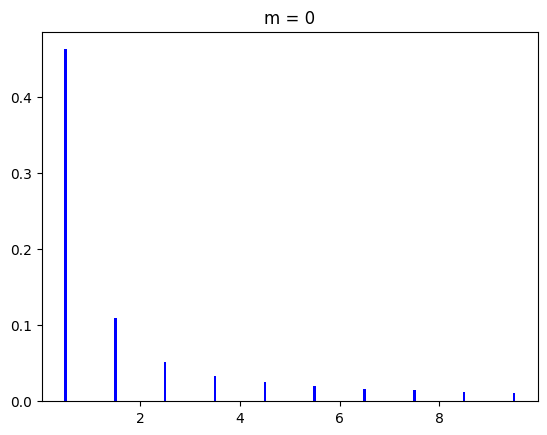

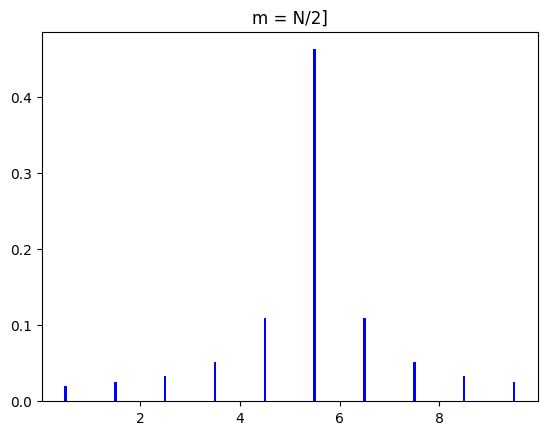

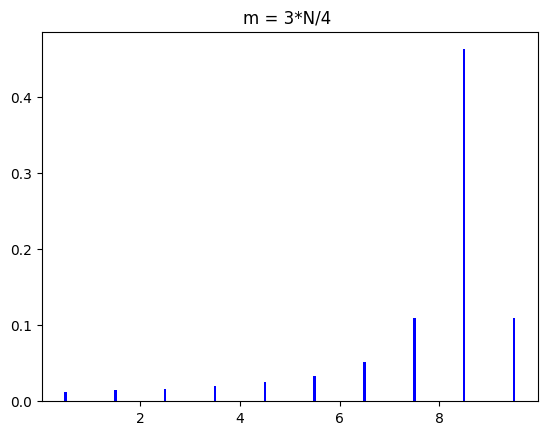

In [ ]:
plt.bar(z, Z[0], color ='blue', width = 0.05)
plt.title("m = 0")
plt.show()

plt.bar(z, Z[ math.ceil(N/2) ], color ='blue', width = 0.05)
plt.title("m = N/2]")
plt.show()

plt.bar(z, Z[ math.ceil(3*N/4) ] , color ='blue', width = 0.05)
plt.title("m = 3*N/4 ")
plt.show()

resolvemos o sistema linear e plotamos. Observamos que a distribuição de carga condiz com o esperado.

In [ ]:
coeficients = np.linalg.solve(Z,v)
print(coeficients.shape)
print(coeficients)

(10,)
[1.45135662 1.14972934 1.09455519 1.06727029 1.05598193 1.05598193
 1.06727029 1.09455519 1.14972934 1.45135662]


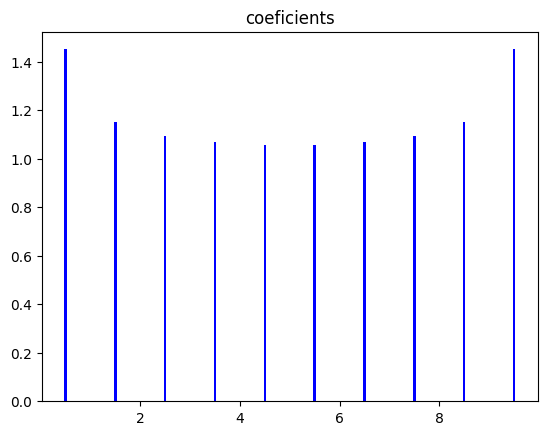

In [ ]:
plt.bar(z, coeficients , color ='blue', width = 0.05)
plt.title("coeficients")
plt.show()

fizemos uma função plot() que recebe L,N,V0,a. E faz todo o processo descrito acima.

Variamos os valores N e a para vermos como o plot se comporta. Aqui observamos algo estranho. Conforme o valore de a cresce nossa função função começa a se distanciar do esperado. 

O que pode estar causando esse efeito?

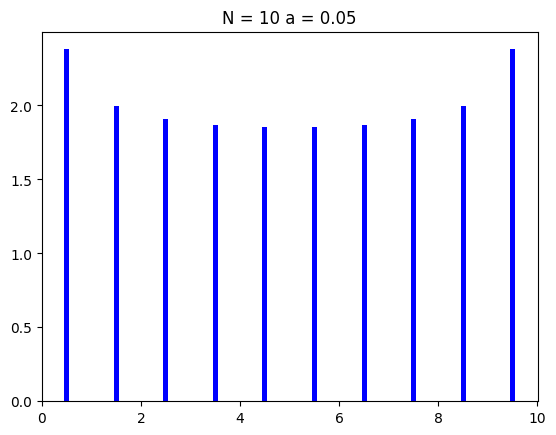

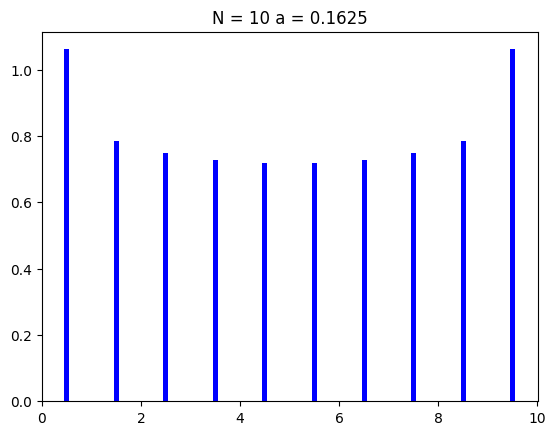

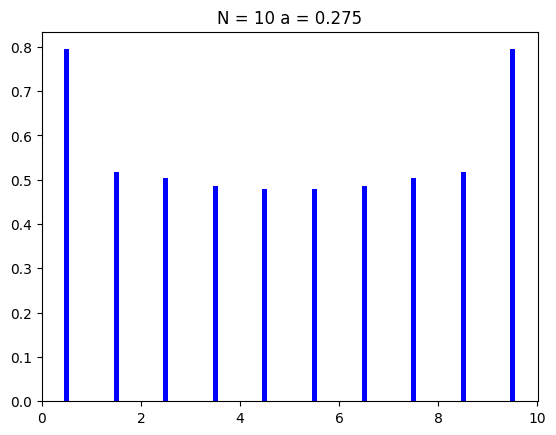

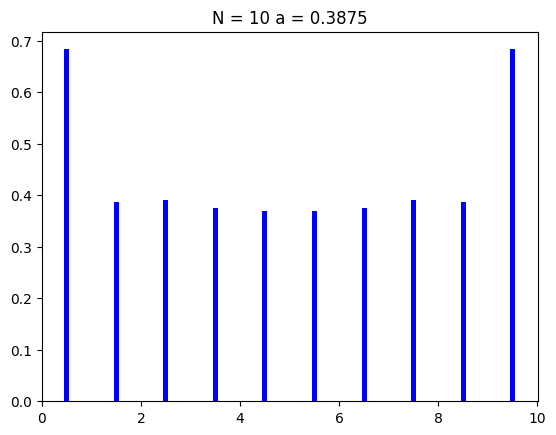

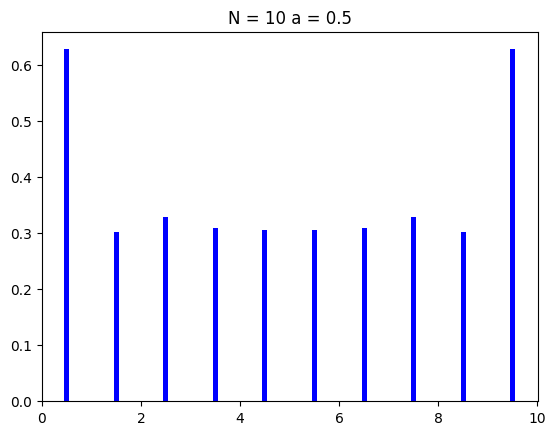

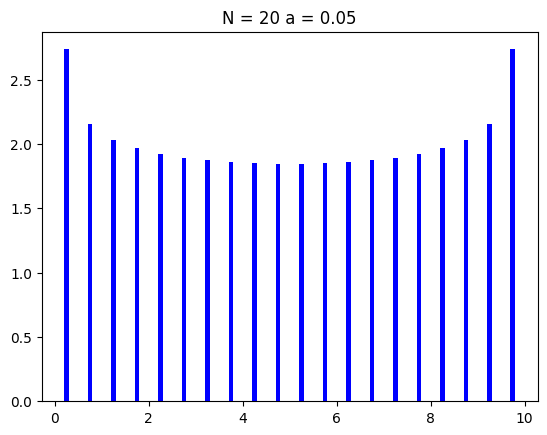

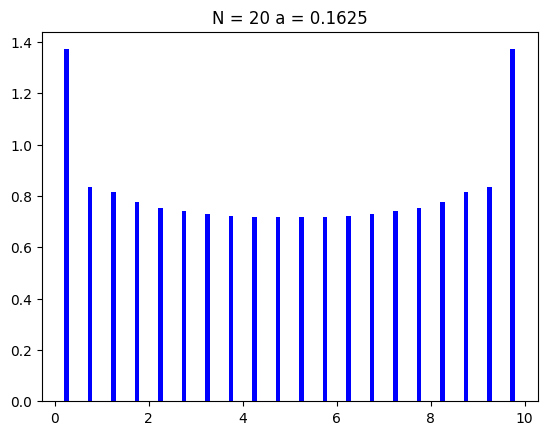

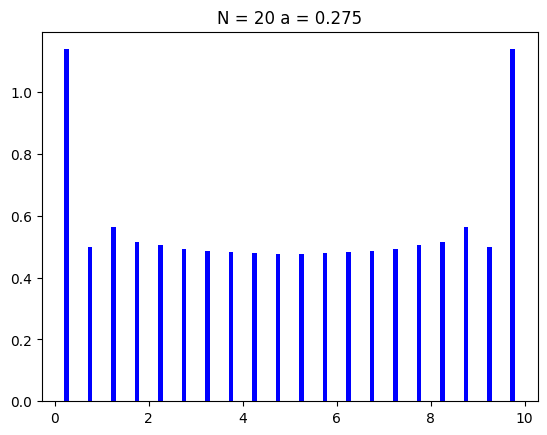

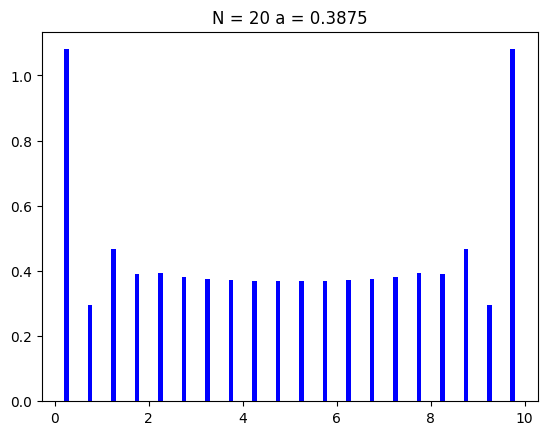

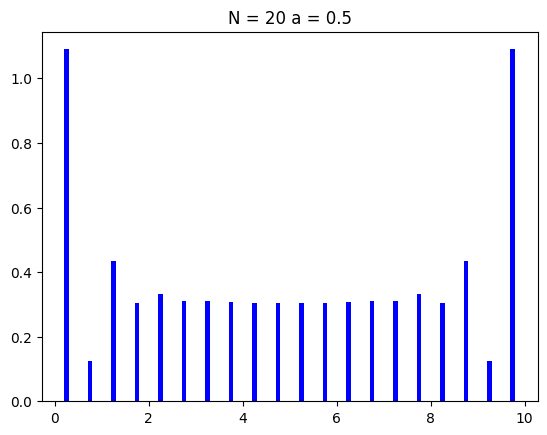

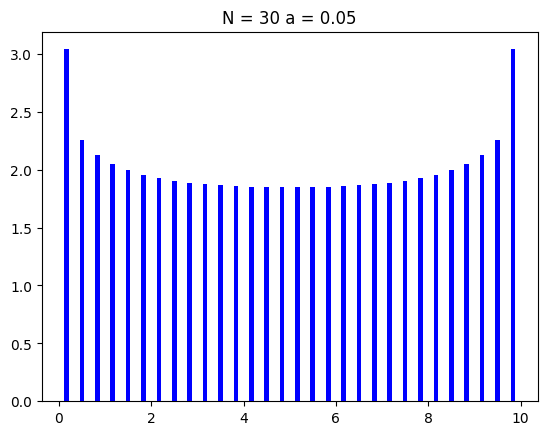

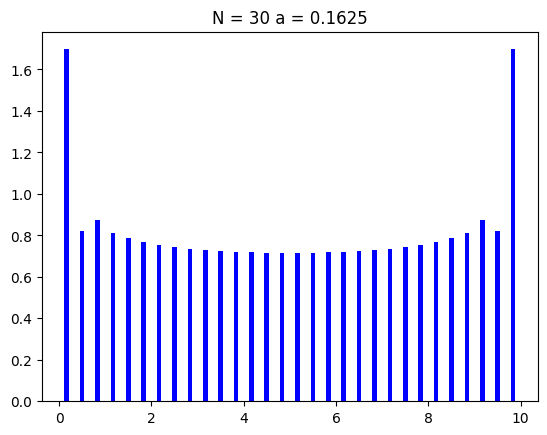

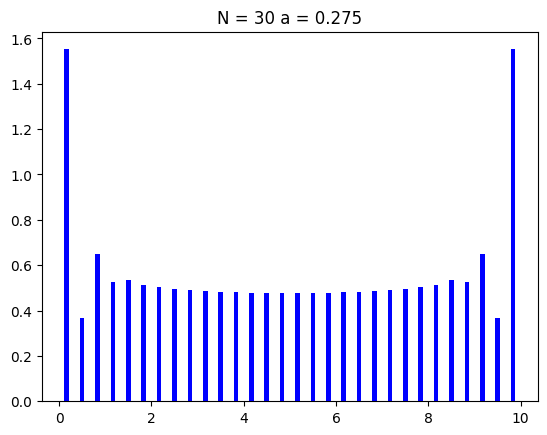

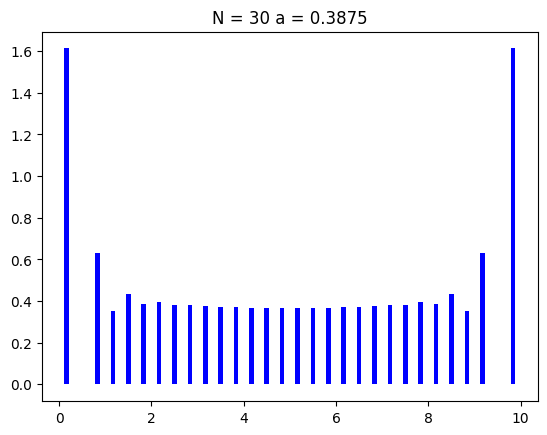

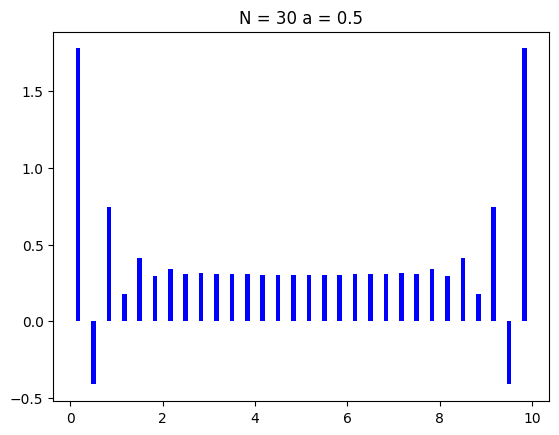

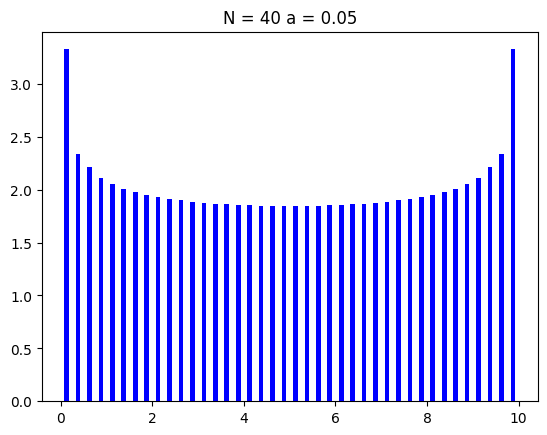

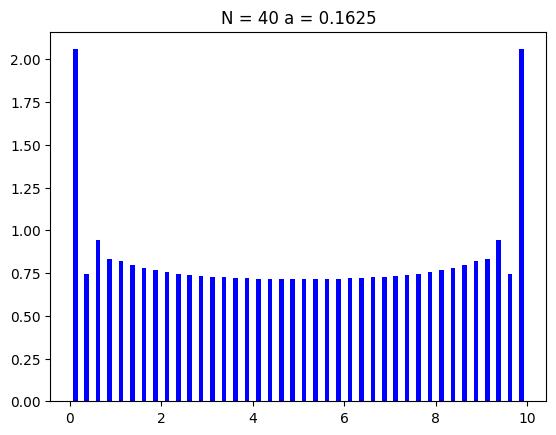

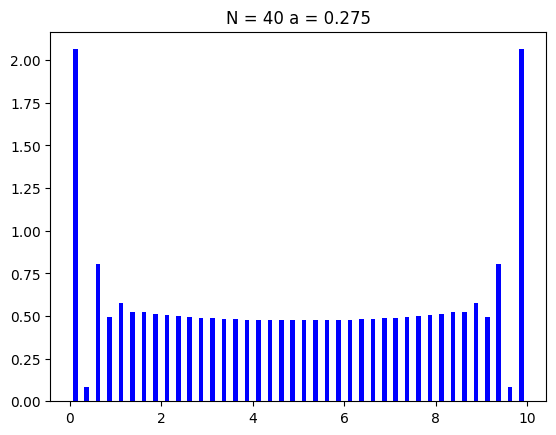

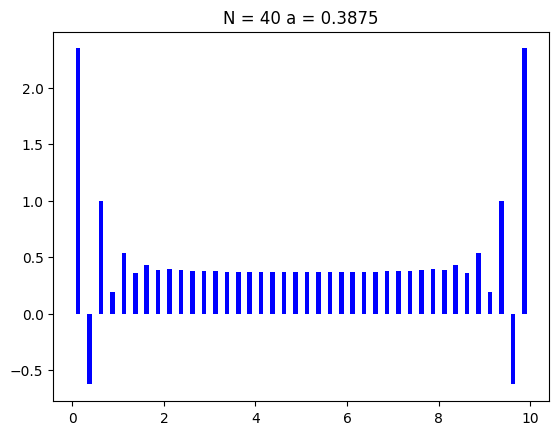

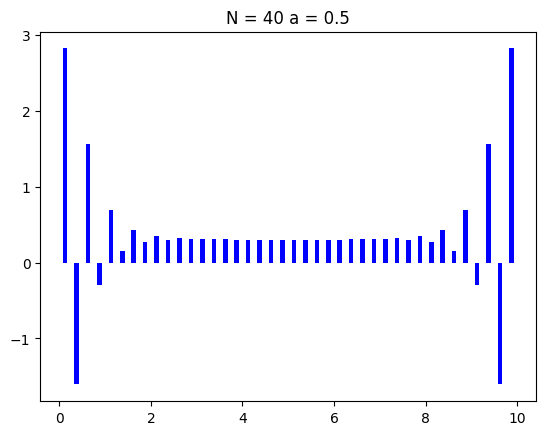

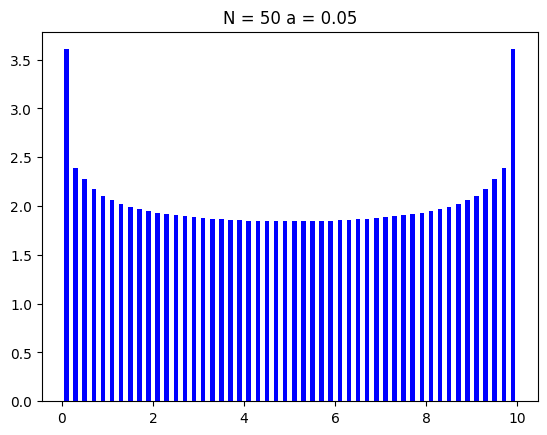

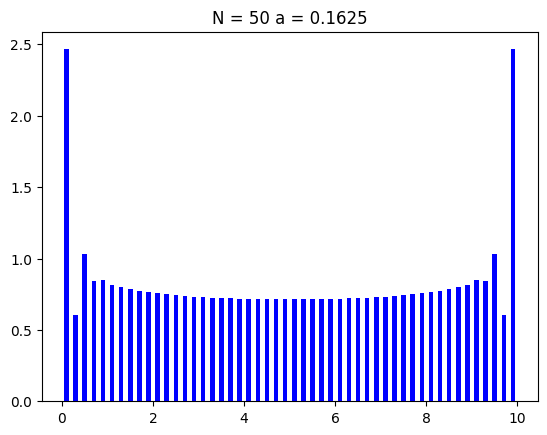

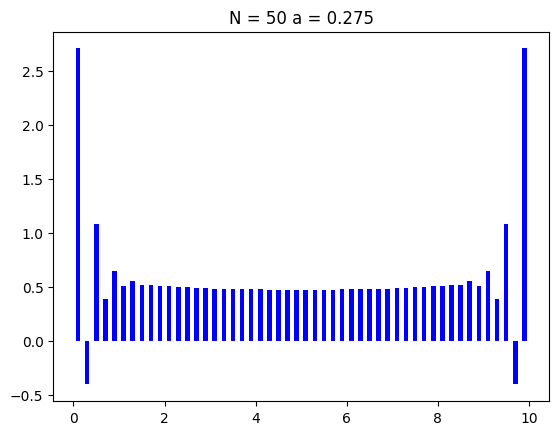

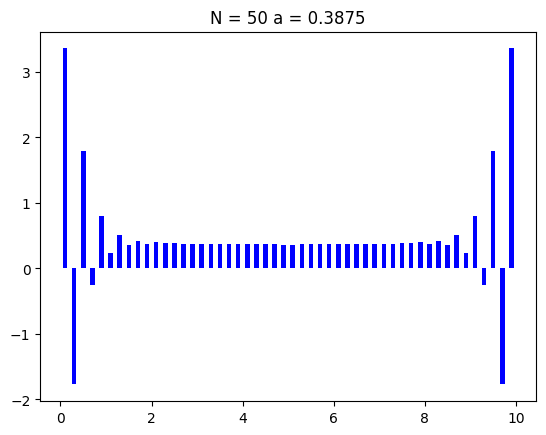

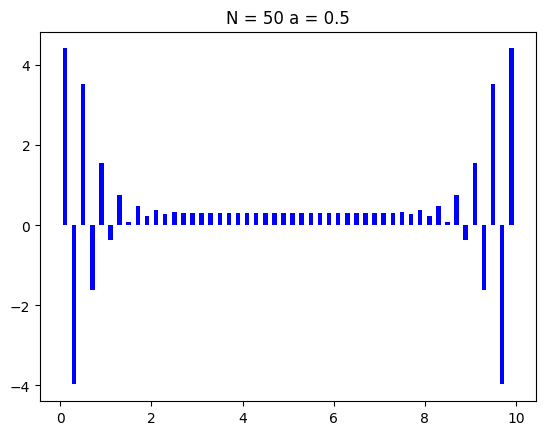

In [ ]:
def plot(L,N,v0,a):
  delta = L / N
  z = center(L,N)
  Z = np.array(impedance_matrix(z,N,a,delta))
  v = volt(N, v0)
  coeficients = np.linalg.solve(Z, v)
  title = "N = {} a = {}".format(N,a)
  plt.bar(z, coeficients , color ='blue', width = 0.1)
  plt.title(title)
  plt.show()

L  = 10
v0 = 1
a  = 0.1
A = np.linspace(0.05, 0.5, 5)

for n in range(1, 6):
  for a  in A:
    plot(L, n*10 , v0, a)


